<a href="https://colab.research.google.com/github/sergejhorvat/TensorFlow-in-Practice---Coursera/blob/master/Natural%20Language%20Processing%20in%20TensorFlow/Week_3_Lesson_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [2]:
#from __future__ import absolute_import, division, print_function, unicode_literals
# If the tf.__version__ is 1.x, please run this cell
!pip install tensorflow-gpu==2.0.0

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# If the tf.__version__ is 1.x, please run this cell
#!pip install tensorflow-gpu==2.0.0

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0


In [5]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 322s 823ms/step - loss: 0.5753 - accuracy: 0.6948 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 310s 793ms/step - loss: 0.3551 - accuracy: 0.8557 - val_loss: 0.4009 - val_accuracy: 0.8354
Epoch 3/10
391/391 [==============================] - 307s 785ms/step - loss: 0.4785 - accuracy: 0.7816 - val_loss: 0.4881 - val_accuracy: 0.7741
Epoch 4/10
391/391 [==============================] - 305s 781ms/step - loss: 0.4432 - accuracy: 0.7966 - val_loss: 0.4519 - val_accuracy: 0.7999
Epoch 5/10
391/391 [==============================] - 307s 784ms/step - loss: 0.4041 - accuracy: 0.8216 - val_loss: 0.5288 - val_accuracy: 0.7524
Epoch 6/10
391/391 [==============================] - 305s 780ms/step - loss: 0.3629 - accuracy: 0.8412 - val_loss: 0.4703 - val_accuracy: 0.8036
Epoch 7/10
391/391 [==============================] - 304s 778ms/step - loss: 0.3019 - accuracy: 0.8798 - val_loss: 

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

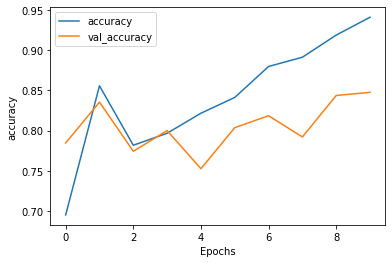

In [13]:
plot_graphs(history, 'accuracy')

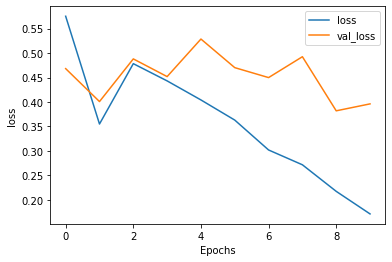

In [14]:
plot_graphs(history, 'loss')